# Seaborn - Structured Multi-Plot Grids
* often referred to as "Lattice" plotting

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

## Small multiples
#### FacetGrid( ) - good for viewing distribution/relationship, between multiple variables, separately
* 3 dimensions - row, col, hue

In [2]:
tips = sns.load_dataset("tips")

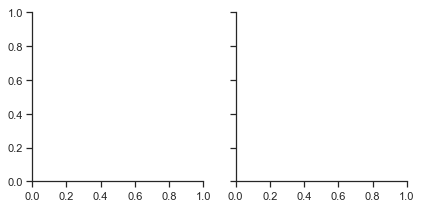

In [3]:
g = sns.FacetGrid(tips, col="time")

In [15]:
tips.describe

<bound method NDFrame.describe of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
5         25.29  4.71    Male     No   Sun  Dinner     4
6          8.77  2.00    Male     No   Sun  Dinner     2
7         26.88  3.12    Male     No   Sun  Dinner     4
8         15.04  1.96    Male     No   Sun  Dinner     2
9         14.78  3.23    Male     No   Sun  Dinner     2
10        10.27  1.71    Male     No   Sun  Dinner     2
11        35.26  5.00  Female     No   Sun  Dinner     4
12        15.42  1.57    Male     No   Sun  Dinner     2
13        18.43  3.00    Male     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
15        21.58  3.92    Male     No   Sun  Dinner    

#### FacetGrid.map( ) - approach for visualizing data on the above grid

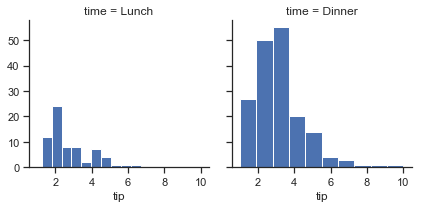

In [4]:
g = sns.FacetGrid(tips, col="time")

g.map(plt.hist, "tip");

* for Relational Plots, pass multiple variables

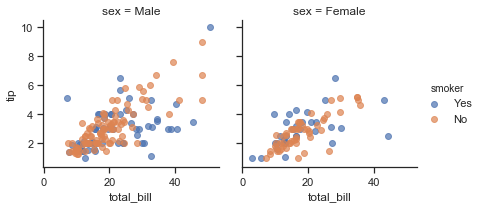

In [5]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

### Control how the Grid looks
* margin_titles
* set Size facet - with height & aspect ratio

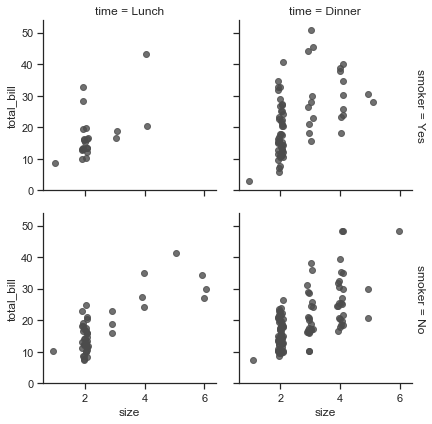

In [6]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


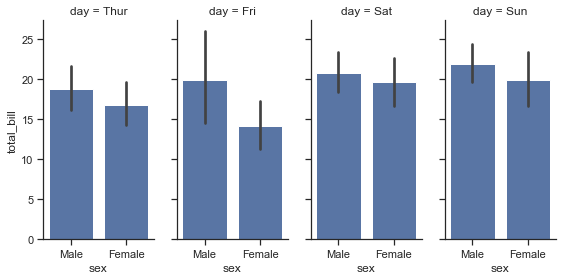

In [7]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill");

### Facets are ordered by default, in the order of the information in the DataFrame
* if the variable (defining the facet) is categorical - the category order is used
* desired orders can be set - using *_order

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


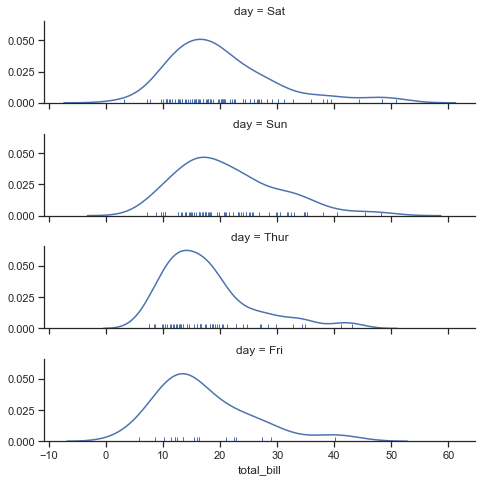

In [8]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True);

### When plotting many levels of a single variable - they can be plotted along Columns
* then 'Wrapped' to span multiple rows
* cannot use Row when plotting this way

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


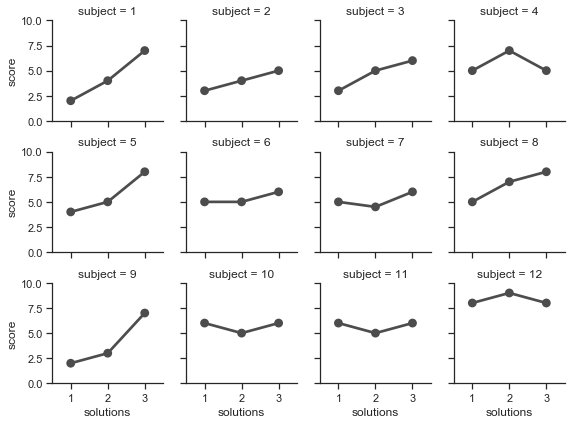

In [9]:
attend = sns.load_dataset("attention").query("subject <= 12")
g = sns.FacetGrid(attend, col="subject", col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", color=".3", ci=None);

### Figure Manipulation with FacetGrid
* FacetGrid.map( ) - can be called multiple times once plotted
* Manipulate using FacetGrid.set( )
* could also use FacetGrid.set_axis_labels( )
    * this method takes into account, interior facets lacking axis labels

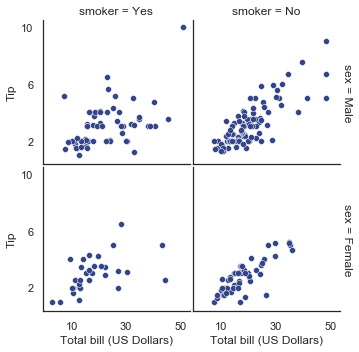

In [10]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, height=2.5)
g.map(plt.scatter, "total_bill", "tip", color="#334488", edgecolor="white", lw=.5);
g.set_axis_labels("Total bill (US Dollars)", "Tip");
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10]);
g.fig.subplots_adjust(wspace=.02, hspace=.02);

### Manipulation with Figure & Axes 
* Work directly with these matplotlib objects

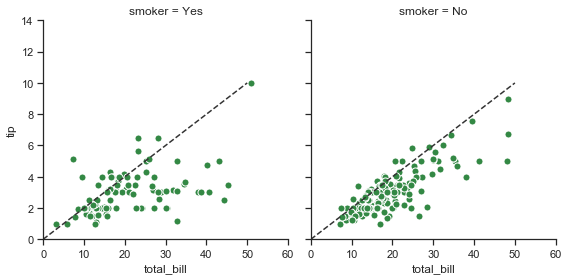

In [11]:
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 * 50), c=".2", ls="--")
g.set(xlim=(0, 60), ylim=(0, 14));

## Custom Functions
### Custom functions (not limited to seaborn, matplotlib) must follow rules:
* must plot onto Current-Active matplotlib Axes
    * plt.gca - provides a reference of the Current Axes
* must accept the data to be plotted, in Positional Arguments
* must be able to accept Color and Label arguments
    * generally easy to catch a Dictionary of **kwargs - and pass it to function 

### Consider this example
* Begin with a simple single vector for each facet

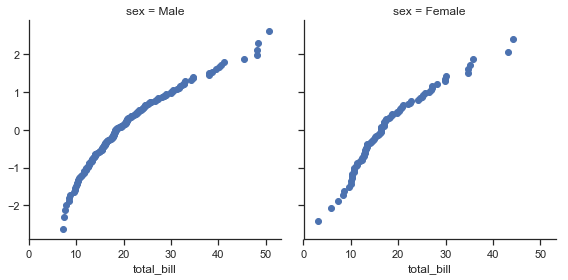

In [12]:
from scipy import stats
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)

g = sns.FacetGrid(tips, col="sex", height=4)
g.map(quantile_plot, "total_bill");

* for a bivariate plot - the function should accept the x-axis variable 1st, y-axis variable 2nd

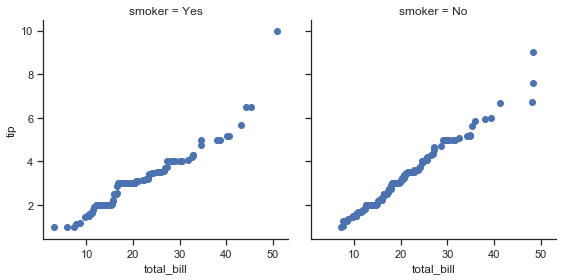

In [13]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sns.FacetGrid(tips, col="smoker", height=4)
g.map(qqplot, "total_bill", "tip");

* hue facets can be easily added - due the plt.scatter accepting color & label arguments

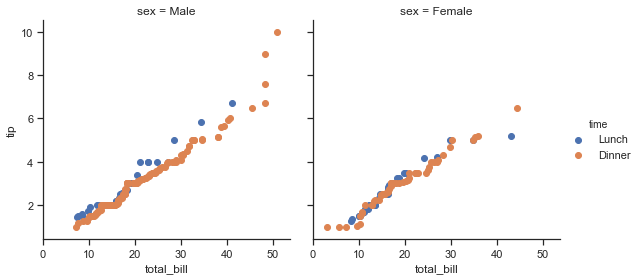

In [14]:
g = sns.FacetGrid(tips, hue="time", col="sex", height=4)
g.map(qqplot, "total_bill", "tip")
g.add_legend();

* additonal aesthetics can further distinguish the hue variable
    * these arguments are independent of the faceting variables

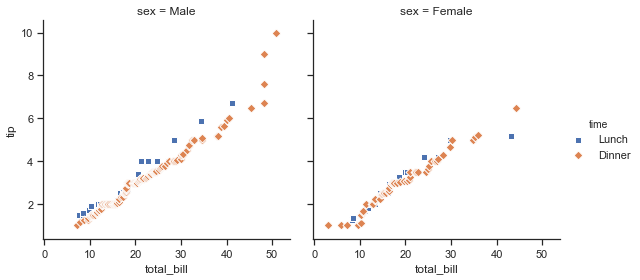

In [16]:
g = sns.FacetGrid(tips, hue="time", col="sex", height=4,
                  hue_kws={"marker": ["s", "D"]})
g.map(qqplot, "total_bill", "tip", s=40, edgecolor="w")
g.add_legend();

#### Sometimes a custom function refrains from working as desired, with color and label
* In this case, they need to be explicitly handled (within the context of the function)
* Below this is the case, as plt.hexbin does not typically mesh well with the FacetGrid API

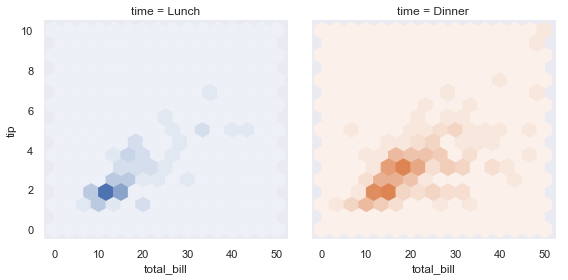

In [17]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue="time", col="time", height=4)
g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10]);

# Pairwise Relationships
* often called "Scatterplot Matrices" - however not limited to scatterplots

### Difference between FacetGrid and PairGrid
* FacetGrid - each facet displays the same relationship, conditioned over other variables
* PairGrid - each plot shows a Different relationship
    * PairGrid offers a quick summary

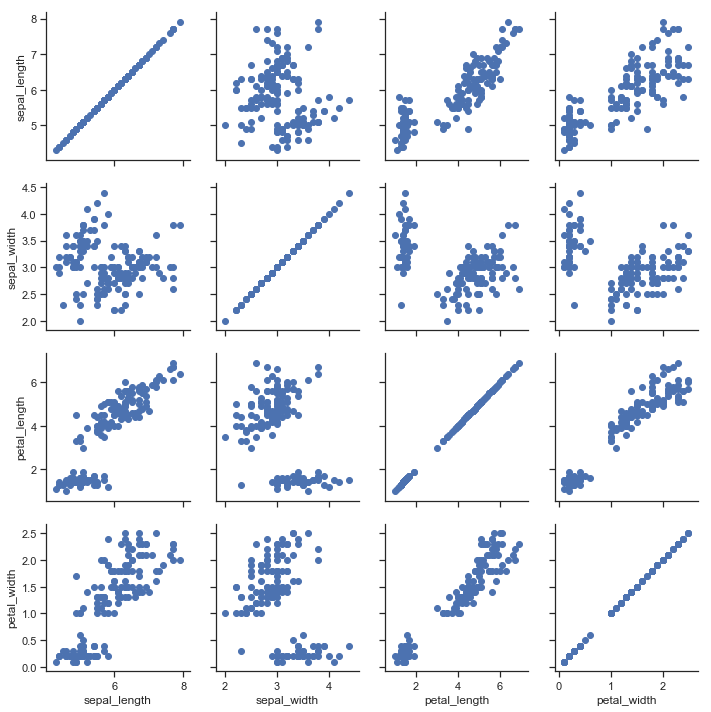

In [18]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(plt.scatter);

In [21]:
iris.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     setosa


### Plot a different function on the diagonal - to show univariate distribution of the variable of each column

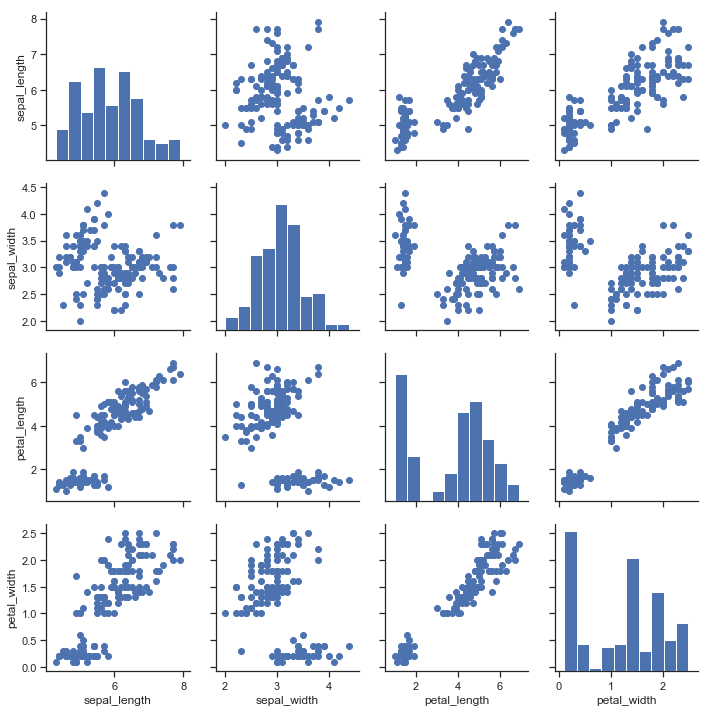

In [19]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

* color the observations, based on a separate Categorical variable

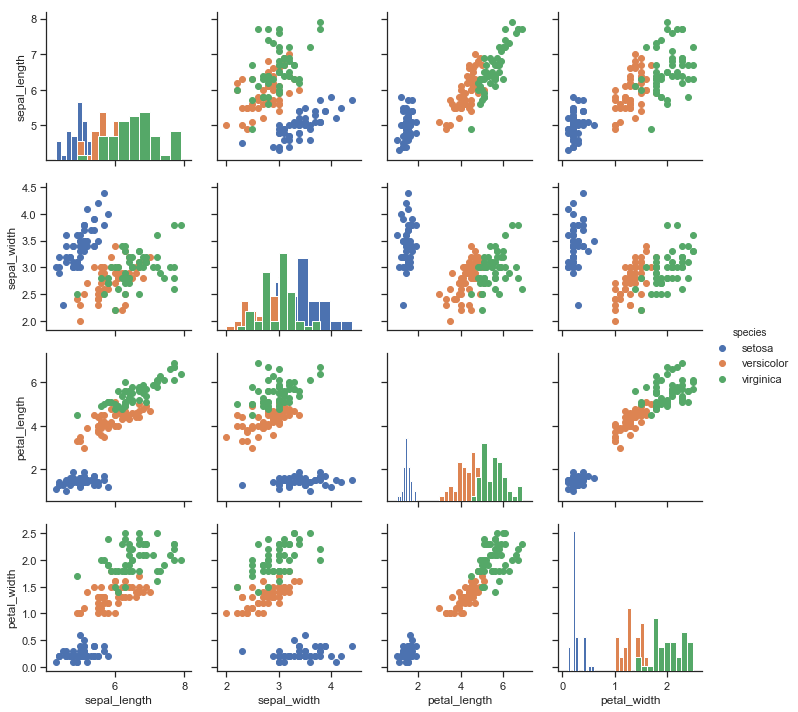

In [20]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

* by default, all Numeric Columns will be used
    * this can be narrowed for a specific focus

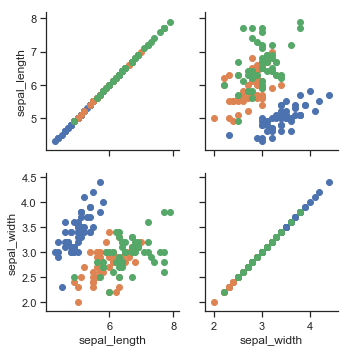

In [22]:
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue="species")
g.map(plt.scatter);

### Use different functions - in the Upper & Lower triangles of the matrix
* emphasized different aspects of the variable relationships
* use map_upper( ) - and map_lower ( )

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


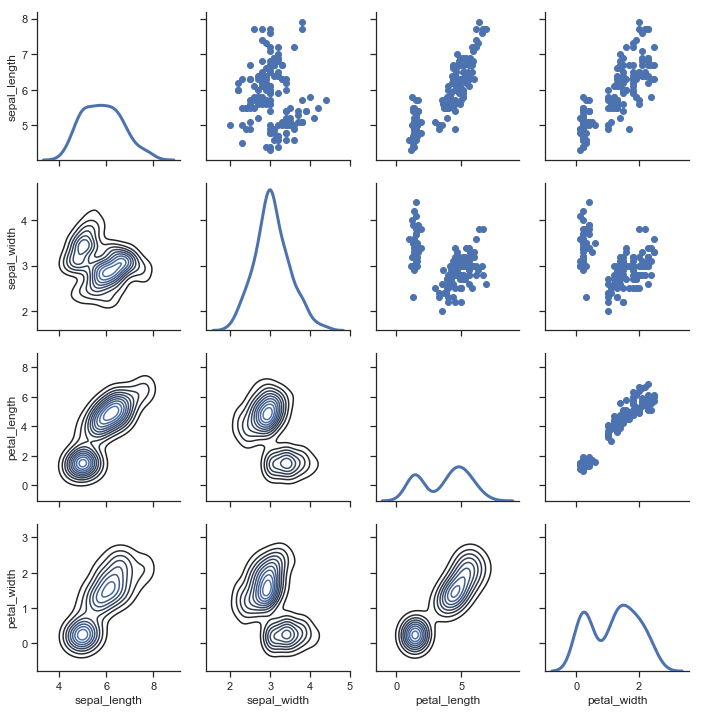

In [23]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False);

## Grid Configurations
* the above structures are just 1 format (square grid)
* different variables can be plotted in the columns and rows

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


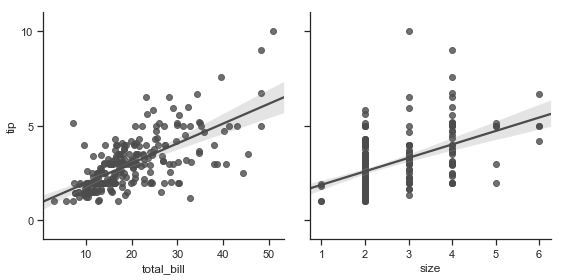

In [24]:
g = sns.PairGrid(tips, y_vars=["tip"], x_vars=["total_bill", "size"], height=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10]);

* configure aesthetics - apply Ordering of the hue variable palette 

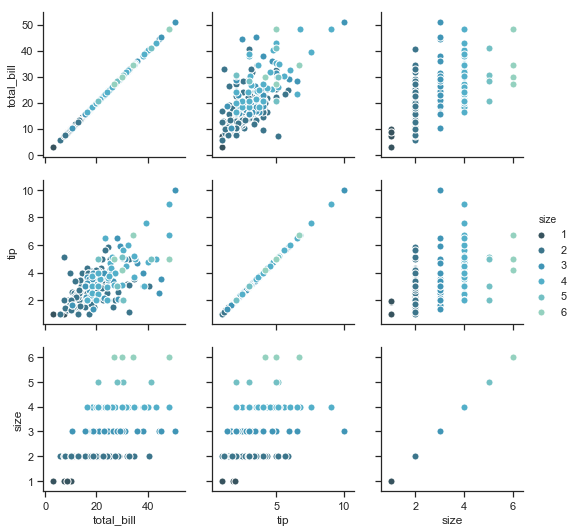

In [25]:
g = sns.PairGrid(tips, hue="size", palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend();

### Pairplot( ) can be more flexible than pairgrid, for taking a quick glance at the dataset
* the function, by default, uses scatterplots and histograms
    * however other kinds can be used

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


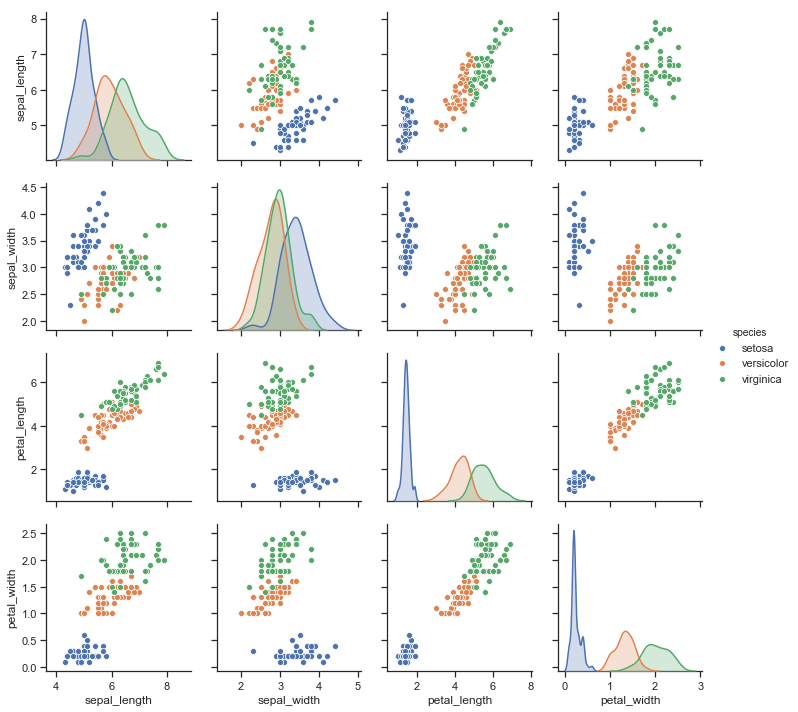

In [27]:
sns.pairplot(iris, hue="species", height=2.5);

* further manipulation can alter the aesthetics further

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


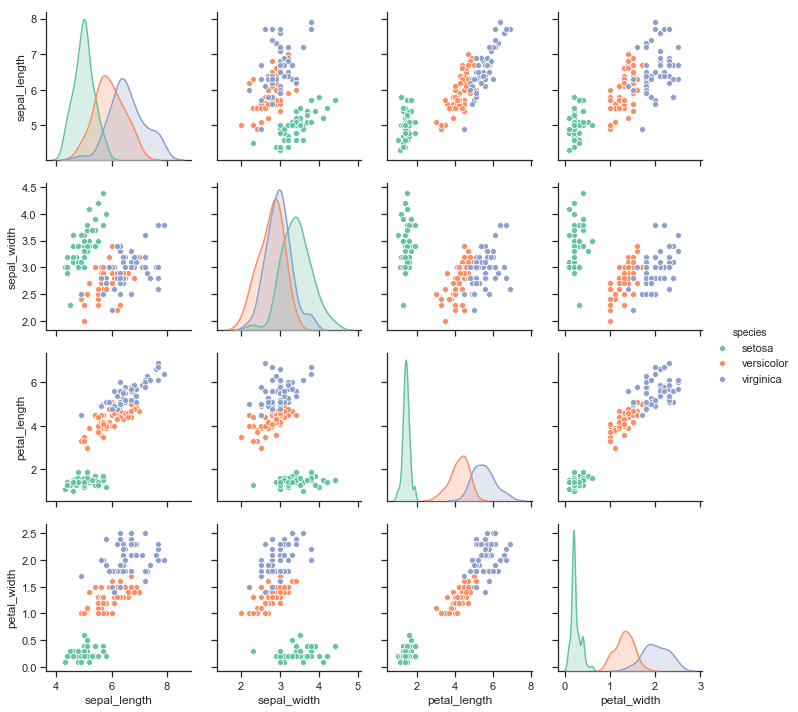

In [28]:
g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", height=2.5)